In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

### Importing data frame 'WDICountries-Final.csv'

In [4]:
# Define the file path
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\WDICountries-Final.csv'

# Import the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful import
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Short Name,Currency Unit,Region,Income Group,Lending category,Other groups,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,BRA,Consumer price index (2010 = 100),FP.CPI.TOTL,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,1.269272e+02,1.383886e+02,1.504826e+02,1.556688e+02,1.613738e+02,1.673979e+02,1.727743e+02,1.871174e+02,2.044821e+02,2.138751e+02
1,Brazil,BRA,Exports of goods and services (annual % growth),NE.EXP.GNFS.KD.ZG,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,-1.569680e+00,6.819564e+00,8.631256e-01,4.908793e+00,4.053084e+00,-2.561421e+00,-2.290906e+00,4.382257e+00,5.742840e+00,1.023139e+00
2,Brazil,BRA,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,1.913467e+00,-2.801311e+00,-2.881157e+00,1.340161e+00,1.989841e+00,1.869906e+00,-4.358738e+00,3.251385e+00,3.659589e+00,2.794976e+00
3,Brazil,BRA,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,3.571353e+00,3.592149e+00,4.137378e+00,3.338260e+00,4.078588e+00,3.692673e+00,2.592638e+00,2.779791e+00,3.822196e+00,2.954793e+00
4,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.873288e+12,1.476107e+12,1.670647e+12,1.951924e+12,2.173666e+12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      80 non-null     object 
 1   Country Code      80 non-null     object 
 2   Indicator Name    80 non-null     object 
 3   Indicator Code    80 non-null     object 
 4   Short Name        80 non-null     object 
 5   Currency Unit     80 non-null     object 
 6   Region            80 non-null     object 
 7   Income Group      80 non-null     object 
 8   Lending category  70 non-null     object 
 9   Other groups      0 non-null      float64
 10  1960              9 non-null      float64
 11  1961              31 non-null     float64
 12  1962              31 non-null     float64
 13  1963              32 non-null     float64
 14  1964              32 non-null     float64
 15  1965              32 non-null     float64
 16  1966              32 non-null     float64
 17 

### Creating subset for series analysis:

 - Filtering Data Frame for India and Final consumption expenditure (annual % growth)/Consumption Growth

In [10]:
# Filter the dataset for India and NE.CON.TOTL.KD.ZG indicator from 1980 onwards
df_india = df[(df['Country Name'] == 'India') & (df['Indicator Code'] == 'NE.CON.TOTL.KD.ZG')]

 - Reducing Data Frame time frame:

In [13]:
# Select relevant columns (from 1980 onwards)
df_india = df_india[['Country Name', 'Indicator Code'] + [str(year) for year in range(1980, 2023)]]

 - Pivoting Data Frame

In [18]:
# Pivot the table (melt to make the year a variable)
df_india_pivot = df_india.melt(id_vars=['Country Name', 'Indicator Code'], var_name='Date', value_name='NE.CON.TOTL.KD.ZG')

 - Reseting the index and set the 'Date' column as the index

In [23]:
# Reset the index and set the 'Date' column as the index
df_india_pivot = df_india_pivot.set_index('Date').reset_index()

 - Shapping Data Frame

In [25]:
# Drop unnecessary columns
df_india_pivot = df_india_pivot[['Date', 'NE.CON.TOTL.KD.ZG']]

# Display the first few rows of the new DataFrame
df_india_pivot.head()

,Date,NE.CON.TOTL.KD.ZG
0,1980,8.473115
1,1981,4.332289
2,1982,2.005283
3,1983,7.349639
4,1984,3.437596


In [27]:
df_india_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               43 non-null     object 
 1   NE.CON.TOTL.KD.ZG  43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 820.0+ bytes


In [30]:
# Define the export file path
export_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\India_NE_CON_TOTL_KD_ZG.csv'

# Export the DataFrame to CSV
df_india_pivot.to_csv(export_path, index=False)

print("DataFrame exported successfully!")

DataFrame exported successfully!


### Explanation of Data Selection Logic

I selected the data for **India** and the indicator **NE.CON.TOTL.KD.ZG** (annual percentage growth of total consumption) because it directly reflects the country's consumption trends, which are crucial for evaluating its economic growth potential.

**Purpose:**  
The analysis aims to identify an **emerging market** with strong economic indicators, specifically for the expansion of a **transnational financial firm**. India’s rapid economic growth and rising consumption make it an ideal candidate for this purpose.

**Indicator Relevance:**  
The **NE.CON.TOTL.KD.ZG** indicator captures **total consumption growth**, which includes both private and public spending. This is a key factor in assessing market demand and economic health, essential for determining the viability of financial services expansion.

**Data Points:**  
- **India** was chosen as a high-potential emerging market.
- The data spans from **1980 to 2023** to cover historical trends and recent developments in consumption growth.

By analyzing this indicator, we gain insight into India's economic environment, helping forecast future growth opportunities for financial services.

---

### Disclaimer: Impact of Macroeconomic Events on Time Series Analysis

The **NE.CON.TOTL.KD.ZG** indicator for India may be influenced by significant macroeconomic events, potentially biasing the time series data:

- **Economic Liberalization (1991):** Shifted consumption trends due to increased incomes and market reforms.
- **Demographic Dividend (1990s-2000s):** Boosted consumption as the working-age population grew.
- **COVID-19 Pandemic (2020):** Caused sharp fluctuations in consumption due to lockdowns and recovery stimulus.


---

 - Renaming data frame:

In [42]:
# Rename the DataFrame to something simpler
df_india = df_india_pivot

### Creating a Line Chart

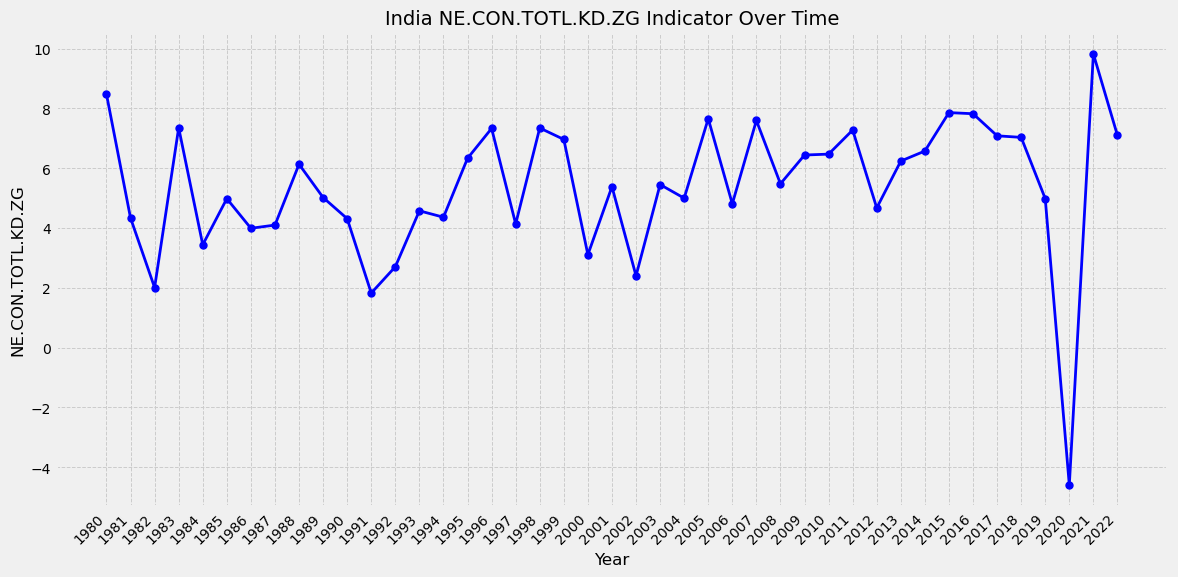

In [47]:
# Plotting the line chart with adjustments
plt.figure(figsize=(12, 6))
plt.plot(df_india['Date'], df_india['NE.CON.TOTL.KD.ZG'], marker='o', linestyle='-', color='blue', linewidth=2, markersize=5)
plt.title('India NE.CON.TOTL.KD.ZG Indicator Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('NE.CON.TOTL.KD.ZG', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save the plot with adjustments
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\6.6 Vizs\line_chart_adjusted.png'
plt.savefig(output_path)

# Show the plot
plt.show()

### Decomposing the data’s components:

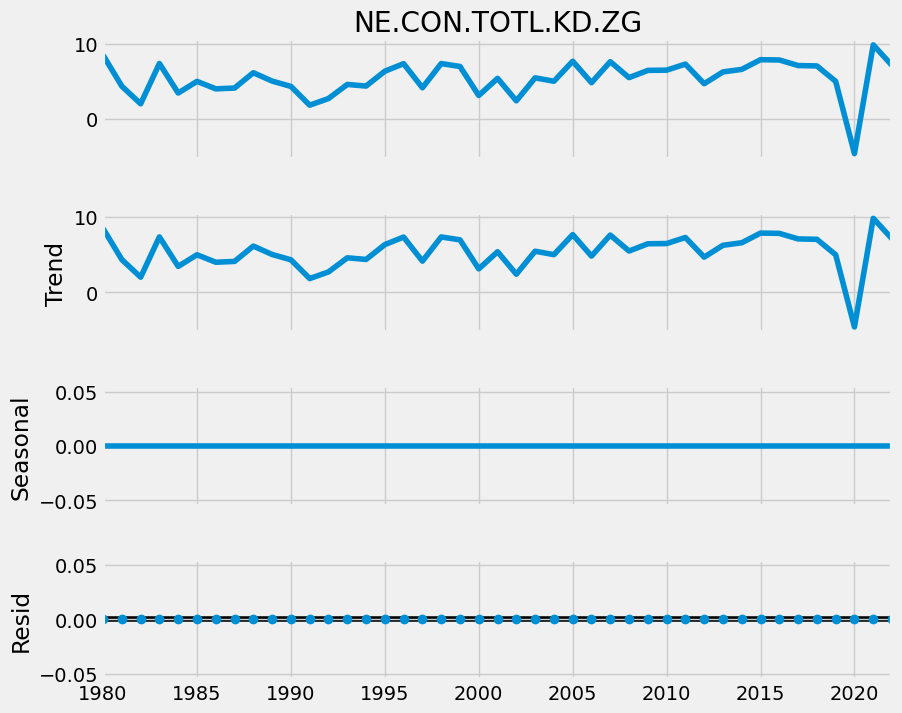

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Date' column is datetime and set as the index
df_india['Date'] = pd.to_datetime(df_india['Date'], format='%Y')
df_india.set_index('Date', inplace=True)

# Drop NaN values if present
df_india = df_india.dropna()

# Decompose the series using the additive model
result_additive = seasonal_decompose(df_india['NE.CON.TOTL.KD.ZG'], model='additive', period=1)

# Plot the decomposed components
fig = result_additive.plot()
fig.set_size_inches(10, 8)

# Save the plot with the decomposition results
decomposition_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\6.6 Vizs\decomposition_plot_additive.png'
fig.savefig(decomposition_path)

# Show the decomposition plot
plt.show()

Decomposition plot:

1. **Observed Data**: Fluctuating consumption growth, with a sharp drop in 2020 (likely due to COVID-19) and a strong rebound.
2. **Trend**: A generally stable long-term trend with occasional dips and rises, especially around 2020.
3. **Seasonality**: No noticeable seasonal patterns.
4. **Residual**: Minimal noise, meaning most variation is explained by the trend.

In summary, the data is primarily driven by the long-term trend, with no significant seasonality and a clear impact from the 2020 pandemic.

### Conduct Dickey-Fuller Test:

In [57]:
from statsmodels.tsa.stattools import adfuller

# Extract the NE.CON.TOTL.KD.ZG series from the DataFrame
series = df_india['NE.CON.TOTL.KD.ZG'].dropna()

# Conduct the Augmented Dickey-Fuller test
adf_test = adfuller(series)

# Print the results of the test
print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Number of Lags Used: {adf_test[2]}")
print(f"Number of Observations: {adf_test[3]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"\t{key}: {value}")

Dickey-Fuller Test Results:
ADF Statistic: -6.823323260480945
p-value: 1.976414308638937e-09
Number of Lags Used: 0
Number of Observations: 42
Critical Values:
	1%: -3.596635636000432
	5%: -2.933297331821618
	10%: -2.6049909750566895


### Dickey-Fuller Test Interpretation

The Dickey-Fuller test was conducted to check the stationarity of the **NE.CON.TOTL.KD.ZG** series. The null hypothesis (H₀) is that the time series is **non-stationary** (i.e., it has a unit root). The alternative hypothesis (H₁) is that the series is **stationary**.

#### Test Results:
- **ADF Statistic**: -6.8233
- **p-value**: 1.9764e-09
- **Critical Values**:
  - 1%: -3.5966
  - 5%: -2.9333
  - 10%: -2.6050

#### Interpretation:
- The **ADF Statistic (-6.8233)** is more negative than the critical values at all significance levels (1%, 5%, 10%).
- The **p-value (1.9764e-09)** is much lower than 0.05.

We **reject the null hypothesis**, concluding that the **NE.CON.TOTL.KD.ZG** series is**stationary**.


---

### Autocorrelation Function

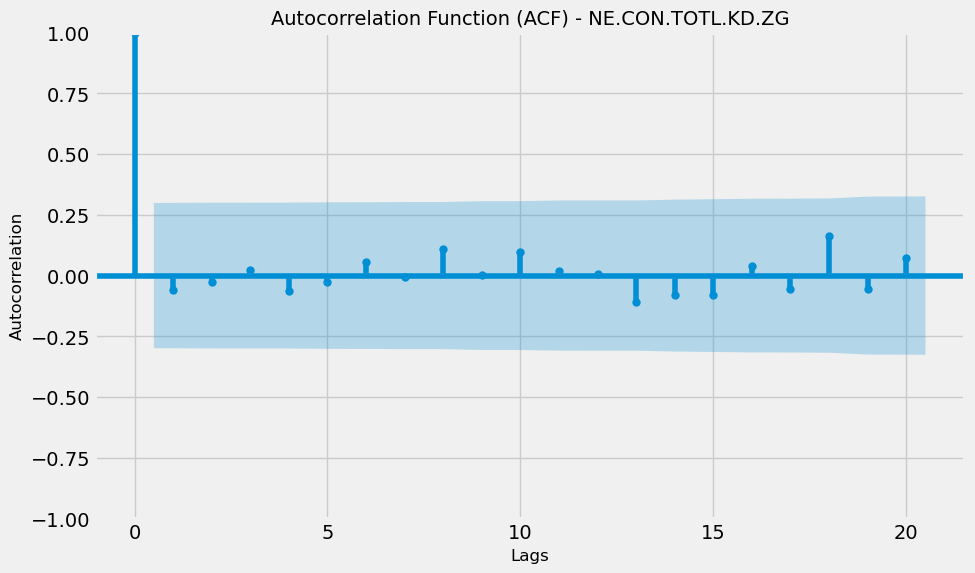

In [78]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF with improvements
plt.figure(figsize=(10, 6))
plot_acf(series, lags=20, ax=plt.gca(), alpha=0.05)  # alpha=0.05 sets the confidence interval to 95%
plt.title('Autocorrelation Function (ACF) - NE.CON.TOTL.KD.ZG', fontsize=14)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid(True)

# Save the improved plot
acf_improved_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\6.6 Vizs\acf_plot_improved.png'
plt.savefig(acf_improved_path)

# Show the plot
plt.show()

The ACF plot shows that:
- **Lag 1** has a slight positive autocorrelation, though not very strong.
- All other lags fall within the 95% confidence interval, indicating **no significant autocorrelation** beyond lag 1.
  
This suggests that the **NE.CON.TOTL.KD.ZG** series is largely uncorrelated with its past values, supporting the previous finding of stationarity.